# Classification and Regression Trees

## Monday November 7, 2016



Fill in missing code

### Classification

In [14]:
from sklearn import tree
import pandas as pd
import numpy as np
#from sklearn.model_selection import train_test_split
from sklearn.cross_validation import train_test_split
from sklearn import metrics
import matplotlib.pyplot as plt

%matplotlib inline


##### Read, Explore, and Process data

In [17]:
# Read in the data
titanic = pd.read_csv('titanic.csv')

# Take a  selection of the features
d = titanic[['Survived', 'Pclass', 'Sex', 'Age', 'SibSp', 'Parch']]

In [18]:
# Check for missing values in all columns
#d._____().sum()
d.isnull().sum()


Survived      0
Pclass        0
Sex           0
Age         177
SibSp         0
Parch         0
dtype: int64

In [19]:
# Check for missing values in Age column, after grouping by other columns
d.groupby(['Sex', 'Pclass']).Age.apply(lambda x: x.isnull().sum()) / d.groupby(['Sex', 'Pclass']).Age.count()

Sex     Pclass
female  1         0.105882
        2         0.027027
        3         0.411765
male    1         0.207921
        2         0.090909
        3         0.371542
Name: Age, dtype: float64

In [20]:
# Fill in missing values with the mean value (use .fillna())
d['Age'] = d['Age'].fillna(d['Age'].mean())

C:\Users\wosim\AppData\Local\Continuum\Anaconda2\lib\site-packages\ipykernel\__main__.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  from ipykernel import kernelapp as app


In [21]:
# Convert any text categorical features to numeric for scikit learn
d['Sex'] = np.where(d.Sex == 'female', 1, 0)

C:\Users\wosim\AppData\Local\Continuum\Anaconda2\lib\site-packages\ipykernel\__main__.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  from ipykernel import kernelapp as app


In [22]:
# Explore the data to identify trends in characteristics of survivors
d.Survived.value_counts()                    # How many people lived and died
d.Survived.mean()                            # The survival rate for everyone
d.groupby('Sex').Survived.mean()             # By Sex: women have higher survival rates
d.groupby('Pclass').Survived.mean()          # By Pclass: 1st class passengers have higher survival rates
d.groupby(['Sex', 'Pclass']).Survived.mean() # By Sex and Pclass: Women in the 1st and 2nd classes had the highest survival rates


Sex  Pclass
0    1         0.368852
     2         0.157407
     3         0.135447
1    1         0.968085
     2         0.921053
     3         0.500000
Name: Survived, dtype: float64

In [23]:
# Create a new feature representing whether the Spouse was on board
d['Spouse'] = ((d.Age > 18) & (d.SibSp >= 1)).astype(int)
d.Spouse.value_counts()
d.groupby(['Pclass', 'Spouse']).Survived.mean() # Having a spouse appears to increase survival in the 1st class only

C:\Users\wosim\AppData\Local\Continuum\Anaconda2\lib\site-packages\ipykernel\__main__.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  from ipykernel import kernelapp as app


Pclass  Spouse
1       0         0.575342
        1         0.742857
2       0         0.473684
        1         0.470588
3       0         0.240786
        1         0.250000
Name: Survived, dtype: float64

In [27]:
survived = d['Survived']
del d['Survived']

#### Split into training and test datasets, and build the model

In [28]:
# Now, split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(d,survived, random_state=1)

In [164]:
# Create a decision tree classifier object (start out with a small tree for interpretability)
ctree = tree.DecisionTreeClassifier(random_state=1, max_depth=3)
        
# Fit the decision tree classifier
ctree.fit(X_train, y_train)


,Pclass,Sex,Age,SibSp,Parch,Spouse
0,3,0,22.000000,1,0,1
1,1,1,38.000000,1,0,1
2,3,1,26.000000,0,0,0
3,1,1,35.000000,1,0,1
4,3,0,35.000000,0,0,0
5,3,0,29.699118,0,0,0
6,1,0,54.000000,0,0,0
7,3,0,2.000000,3,1,0
8,3,1,27.000000,0,2,0
9,2,1,14.000000,1,0,0


#### Confusion Matrix

In [110]:
# How to interpret the diagram?
ctree.classes_


array([0, 1], dtype=int64)

For a plotting function that will plot a nice confusion matrix see: http://scikit-learn.org/stable/auto_examples/model_selection/plot_confusion_matrix.html

In [111]:
# %load confusion_matrix_nice.py
# from confusion_matrix_nice import plot_confusion_matrix
%run confusion_matrix_nice

Confusion matrix, without normalization
[[113  15]
 [ 32  63]]


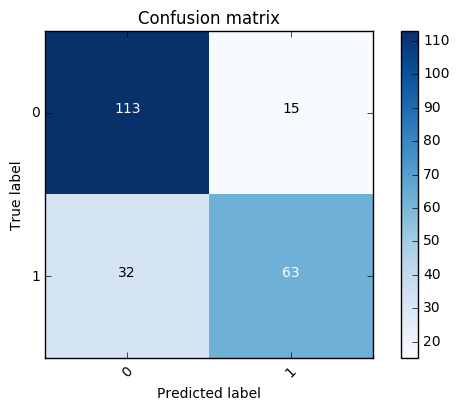

In [112]:
# get the predictions (not the probabilities)
y_pred_class = ctree.predict(X_test)

# plot an attractive confusion matrix
cnf_mat = metrics.confusion_matrix(y_test, y_pred_class, labels = titanic.Survived.unique())
class_labels = titanic.Survived.unique()
plt.figure()
plot_confusion_matrix(cnf_mat, class_labels,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues)
plt.show()

#### Use the Model

In [113]:
# Create a feature vector for reference. We will create fictional values for test observations. 
features = X_train.columns.tolist()
features

['Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Spouse']

In [114]:
# Predict what will happen for 1st class woman
#features
ctree.predict_proba([1, 1, 25, 0, 0, 0])
ctree.predict([1, 1, 25, 0, 0, 0])


C:\Users\wosim\AppData\Local\Continuum\Anaconda2\lib\site-packages\sklearn\utils\validation.py:386: DeprecationWarning: Passing 1d arrays as data is deprecated in 0.17 and willraise ValueError in 0.19. Reshape your data either using X.reshape(-1, 1) if your data has a single feature or X.reshape(1, -1) if it contains a single sample.
  DeprecationWarning)
C:\Users\wosim\AppData\Local\Continuum\Anaconda2\lib\site-packages\sklearn\utils\validation.py:386: DeprecationWarning: Passing 1d arrays as data is deprecated in 0.17 and willraise ValueError in 0.19. Reshape your data either using X.reshape(-1, 1) if your data has a single feature or X.reshape(1, -1) if it contains a single sample.
  DeprecationWarning)


array([1], dtype=int64)

In [115]:

# Predict what will happen for a 3rd class man
ctree.predict_proba([3, 0, 25, 0, 0, 0])
ctree.predict([3, 0, 25, 0, 0, 0])


C:\Users\wosim\AppData\Local\Continuum\Anaconda2\lib\site-packages\sklearn\utils\validation.py:386: DeprecationWarning: Passing 1d arrays as data is deprecated in 0.17 and willraise ValueError in 0.19. Reshape your data either using X.reshape(-1, 1) if your data has a single feature or X.reshape(1, -1) if it contains a single sample.
  DeprecationWarning)
C:\Users\wosim\AppData\Local\Continuum\Anaconda2\lib\site-packages\sklearn\utils\validation.py:386: DeprecationWarning: Passing 1d arrays as data is deprecated in 0.17 and willraise ValueError in 0.19. Reshape your data either using X.reshape(-1, 1) if your data has a single feature or X.reshape(1, -1) if it contains a single sample.
  DeprecationWarning)


array([0], dtype=int64)

#### Evaluate

In [116]:
features

['Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Spouse']

In [117]:
# Which features are the most important?
#ctree.__________
ctree.feature_importances_


array([ 0.21434037,  0.57984541,  0.10888157,  0.09693264,  0.        ,  0.        ])

In [118]:
# Make a Dataframe out of the features and the importance measure for the features
pd.DataFrame(zip(features, ctree.feature_importances_)).sort_index(by=1, ascending=False)

C:\Users\wosim\AppData\Local\Continuum\Anaconda2\lib\site-packages\ipykernel\__main__.py:2: FutureWarning: by argument to sort_index is deprecated, pls use .sort_values(by=...)
  from ipykernel import kernelapp as app


,0,1
1,Sex,0.579845
0,Pclass,0.214340
2,Age,0.108882
3,SibSp,0.096933
4,Parch,0.000000
5,Spouse,0.000000


In [119]:
# Make predictions on the test set
preds = ctree.predict(X_test)


In [108]:
# Calculate accuracy
metrics.accuracy_score(y_test, preds)
#0.726467 - depth = 2
#0.789237 - depth = 3

0.78923766816143492

In [96]:
# Confusion matrix
pd.crosstab(y_test, preds, rownames=['actual'], colnames=['predicted'])

predicted,0,1
actual,,
0,113,15
1,32,63


In [120]:
# Make predictions on the test set using predict_proba
probs = ctree.predict_proba(X_test)[:,1]


In [121]:
# Calculate the AUC metric
metrics.roc_auc_score(y_test, probs)

# Decision Trees have notorouisly high variance, so what can we do
# to better estimate the out of sample error of a high variance model?

#you can adjust the depth to increase the metrics.accuracy_score and to reduce the false positive/false negative

0.82191611842105261

##### Compare against Logistic Regression

In [122]:
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression()
ctree = tree.DecisionTreeClassifier(random_state=1, max_depth=2)

# compare AUC using cross-validation
from sklearn.cross_validation import cross_val_score
cross_val_score(logreg, d, survived, cv=10, scoring='roc_auc').mean()
cross_val_score(ctree, d, survived, cv=10, scoring='roc_auc').mean()

#auc stands and determines for area under the tree. Aim is to maximise the auc or ideally 1
# so far logistic regression is winning..


0.80183585151232217

##### FINE-TUNING THE TREE

In [125]:
from sklearn.grid_search import GridSearchCV

# check CV score for max depth = 3
ctree = tree.DecisionTreeClassifier(max_depth=3)
np.mean(cross_val_score(ctree, d, survived, cv=5, scoring='roc_auc'))

0.83795574885863255

In [134]:
# check CV score for max depth = 10
ctree = tree.DecisionTreeClassifier(max_depth=10)
np.mean(cross_val_score(ctree, d, survived, cv=5, scoring='roc_auc'))

0.81075261993690384

In [161]:
# Conduct a grid search for the best tree depth
ctree = tree.DecisionTreeClassifier(random_state=1)
depth_range = range(1, 20)
param_grid = dict(max_depth=depth_range)
grid = GridSearchCV(ctree, param_grid, cv=5, scoring='roc_auc')
grid.fit(d, survived)


GridSearchCV(cv=5, error_score='raise',
       estimator=DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None, min_samples_leaf=1,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            presort=False, random_state=1, splitter='best'),
       fit_params={}, iid=True, n_jobs=1,
       param_grid={'max_depth': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19]},
       pre_dispatch='2*n_jobs', refit=True, scoring='roc_auc', verbose=0)

In [153]:
# Check out the scores of the grid search
grid_mean_scores = [result[1] for result in grid.grid_scores_]
grid.grid_scores_
#grid_mean_scores

[mean: 0.76679, std: 0.02552, params: {'max_depth': 1},
 mean: 0.80690, std: 0.02795, params: {'max_depth': 2},
 mean: 0.83786, std: 0.02663, params: {'max_depth': 3},
 mean: 0.84030, std: 0.03657, params: {'max_depth': 4},
 mean: 0.84706, std: 0.03162, params: {'max_depth': 5},
 mean: 0.84126, std: 0.03199, params: {'max_depth': 6},
 mean: 0.83737, std: 0.03472, params: {'max_depth': 7},
 mean: 0.82838, std: 0.03736, params: {'max_depth': 8},
 mean: 0.81720, std: 0.04732, params: {'max_depth': 9},
 mean: 0.81445, std: 0.04209, params: {'max_depth': 10},
 mean: 0.79747, std: 0.04204, params: {'max_depth': 11},
 mean: 0.79220, std: 0.04359, params: {'max_depth': 12},
 mean: 0.78810, std: 0.04157, params: {'max_depth': 13},
 mean: 0.78740, std: 0.03864, params: {'max_depth': 14},
 mean: 0.78778, std: 0.04062, params: {'max_depth': 15},
 mean: 0.78592, std: 0.04539, params: {'max_depth': 16},
 mean: 0.78718, std: 0.04435, params: {'max_depth': 17},
 mean: 0.78707, std: 0.04279, params: {'

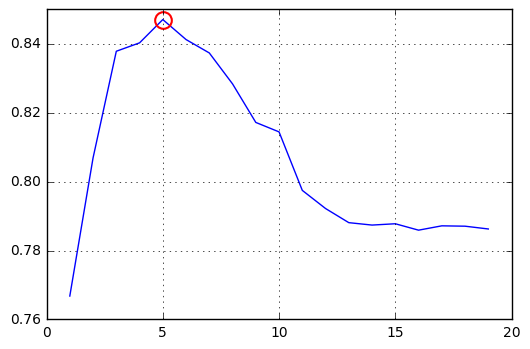

In [138]:
# Plot the results of the grid search
plt.figure()
plt.plot(depth_range, grid_mean_scores)
plt.hold(True)
plt.grid(True)
plt.plot(grid.best_params_['max_depth'], grid.best_score_, 'ro', markersize=12, markeredgewidth=1.5,
         markerfacecolor='None', markeredgecolor='r')


In [147]:
# Get the best estimator
best = grid.best_estimator_


5

In [149]:
cross_val_score(best, d, survived, cv=10, scoring='roc_auc').mean()
cross_val_score(logreg, d, survived, cv=10, scoring='roc_auc').mean()


0.8537953908836261

In [190]:
# Still not as good as Logistic Regression.. 
# Let's try something else


### EXERCISE ###
''' Use Grid Search try scan over three parameters
1. max_depth:     from 1 to 20
2. criterion:     (either 'gini' or 'entropy')
3. max_features : range (1,5)

'''
#Gridx = GridSearchCV(ctree,depth_range,param_grid,)
max_featuresx = range(1,5)
ctreex = tree.DecisionTreeClassifier(random_state = 1, criterion = 'gini', max_features = max_featuresx )
#Gridx = GridSearchCV(ctreex, param_grid, cv =5, scoring='roc_auc')
#ctreex.fit(X_train, y_train)
ctreex.feature_importances_

NotFittedError: Estimator not fitted, call `fit` before `feature_importances_`.

### Regression

In [169]:
# Decision trees (like many other classification models)
# can also be used for regression!


drinks = pd.read_csv('drinks.csv', na_filter=False)

drinks

# Make dummy columns for each of the 6 regions
for continent_ in ['AS', 'NA', 'EU', 'AF', 'SA', 'OC']:
    drinks[continent_] = drinks['continent'] == continent_

drinks


del drinks['continent']
del drinks['country']
del drinks['total_litres_of_pure_alcohol'] # this doesn't seem fair does it?

X = drinks.drop('wine_servings', axis=1)
y = drinks['wine_servings']

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 1)


rtree = tree.DecisionTreeRegressor()

rtree.fit(X_train, y_train)
rtree.predict(X_test)


array([ 339.,    2.,    1.,    7.,    4.,   11.,    9.,  175.,  123.,
          0.,    1.,    1.,    3.,  175.,   24.,  370.,   19.,  221.,
          1.,    2.,   13.,    5.,    0.,    8.,    2.,    0.,   14.,
        123.,    1.,    8.,   13.,    0.,    2.,    0.,    1.,   11.,
          0.,    1.,  129.,    0.,    5.,   28.,   51.,  167.,    1.,
          0.,    5.,    9.,  339.])

In [174]:
#scores = - cross_val_score(rtree, X, y, cv=10, scoring='neg_mean_squared_error')
scores = - cross_val_score(rtree, X, y, cv=10, scoring='mean_squared_error')
mse_scores = scores
mse_scores



array([ 7832.75      ,  5957.85      ,  7793.8       ,  9732.73684211,
        3088.        ,  3246.36842105,  7693.57894737,  3666.57894737,
        5006.94736842,  2776.84210526])

In [175]:
rmse_scores = np.sqrt(mse_scores)
rmse_scores


array([ 88.50282481,  77.18711032,  88.2825011 ,  98.65463416,
        55.56977596,  56.9769113 ,  87.7130489 ,  60.55228276,
        70.75978638,  52.69575035])

In [176]:
rmse_scores.mean()


73.689462604566955

In [183]:

wine_mean = y.mean()
wine_mean


array([  4.13391427e-01,   1.87001610e-01,   6.26157552e-04,
         3.44739417e-04,   3.42597037e-01,   5.72470694e-03,
         3.03758810e-02,   1.99384411e-02])

In [178]:

features = X.columns
pd.DataFrame(zip(features, rtree.feature_importances_)).sort_values(by=1, ascending=False)

,0,1
0,beer_servings,0.413391
4,EU,0.342597
1,spirit_servings,0.187002
6,SA,0.030376
7,OC,0.019938
5,AF,0.005725
2,AS,0.000626
3,NA,0.000345
